In [1]:
#import the dataset 
from keras.datasets import fashion_mnist

In [2]:
#import the required libraries 
from matplotlib import pyplot
import numpy as np

In [43]:
#load the data into train and test 
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
#pyplot.imshow(X_train[2])

In [44]:
noOfImages = X_train.shape[0]
X_train = (1.0/255)*np.array([X_train[i].flatten() for i in range(0,noOfImages)])
X_train = np.array([X_train[i].flatten() for i in range(0,noOfImages)])
noOftestImages= X_test.shape[0]
X_test =(1.0/255)*np.array([X_test[i].flatten() for i in range(0,noOftestImages)])
X_test =np.array([X_test[i].flatten() for i in range(0,noOftestImages)])
print(X_test.shape)


(10000, 784)


In [45]:
#print(X_train[0])

In [46]:
def softmax(X):
  X=np.exp(X)
  sum=np.sum(X,axis=0)
  return X/sum 


In [47]:
def sigmoidFunc(X):

  return 1.0/(1.0+np.exp(-X))
  #return res

In [48]:
def gDash(X):
  return sigmoidFunc(X)*(1-sigmoidFunc(X))

In [49]:
def forwardPropagation(X,parameters):
  preactivation={}
  activation={}
  activation['h0']=X.T
  #print(activation['h0'].shape)
  for k in range(1,noOfHiddenLayers+1):
    preactivation['a'+str(k)]=np.dot(parameters['W'+str(k)],activation['h'+str(k-1)])+parameters['b'+str(k)]
    activation['h'+str(k)]=sigmoidFunc(preactivation['a'+str(k)])
    #print('h size '+str(k),activation['h'+str(k)].shape)
    #print('a'+str(k),preactivation['a'+str(k)])
  preactivation['a'+str(noOfHiddenLayers+1)]=np.dot(parameters['W'+str(noOfHiddenLayers+1)],activation['h'+str(noOfHiddenLayers)])+parameters['b'+str(noOfHiddenLayers+1)]
  y=softmax(preactivation['a'+str(noOfHiddenLayers+1)])    
  #print("a last" ,preactivation['a'+str(noOfHiddenLayers+1)])
  return (preactivation,activation,y)



In [50]:
def backPropagation(parameters,activation,preactivation,yhat,X,y_train):
  grads={}
  eIndicator=np.zeros((10,X.shape[0]))
  eIndicator[y_train,np.arange(X.shape[0])]=1
  #print(y_train)
  #print(eIndicator)
  #print(eIndicator.shape)
  grads['a'+str(noOfHiddenLayers+1)]= -(eIndicator-yhat)
  #print(grads['a'+str(noOfHiddenLayers+1)].shape)
  for j in range(noOfHiddenLayers+1,0,-1):
    grads['W'+str(j)]= np.dot(grads['a'+str(j)],activation['h'+str(j-1)].T)
    #grads['W'+str(j)]= np.dot(activation['h'+str(j-1)],grads['a'+str(j)].T).T
    #print(grads['W'+str(j)].shape)
    grads['b'+str(j)]= np.sum(grads['a'+str(j)],axis=1,keepdims=True)
    ###grads['h'+str(j-1)]=np.dot(grads['W'+str(j)].T,grads['a'+str(j)]) #error
    grads['h'+str(j-1)]=np.dot(parameters['W'+str(j)].T,grads['a'+str(j)])
    #print('h'+str(j-1),grads['h'+str(j-1)].shape)
    #print('a'+str(j-1),preactivation['a'+str(j-1)].shape)
    if (j!=1):
      grads['a'+str(j-1)]=grads['h'+str(j-1)]*gDash(preactivation['a'+str(j-1)])
  return grads
#backPropagation()

In [51]:
def Loss(yhat,y_train,X):
  eIndicator=np.zeros((10,X.shape[0]))
  eIndicator[y_train,np.arange(X.shape[0])]=1
  eIndicator=eIndicator*yhat
  eIndicator=eIndicator.sum(axis=0)
  eIndicator=np.log(eIndicator)
  return -sum(eIndicator)


In [92]:
#@title
noOfHiddenLayers=2
l=10 #output classes
noOfneuronsEach=[120,20]
inputNeuronSize=X_train.shape[1]
print(inputNeuronSize)
parameters={}
#eta=0.1
#input W
loss = []
batchSize=600
iterations=100
#eta=1   
eta=0.001   #for rmsprop higher learning rate gradients explode causing overflow
eta=0.002 #Nadam
#input W
#initialization
parameters['W'+str(1)] =np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[0], inputNeuronSize))
parameters['b'+str(1)]= np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[0],1))
#parameters['W'+str(1)] =0+1.5*np.random.randn(noOfneuronsEach[0], inputNeuronSize)
#parameters['b'+str(1)]= 0+1.5*np.random.randn(noOfneuronsEach[0],1)
for i in range(2,noOfHiddenLayers+1):
  parameters['W'+str(i)] = np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[i-1], noOfneuronsEach[i-2]))
  parameters['b'+str(i)]= np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[i-1],1))
  #parameters['W'+str(i)] = 0+1.5*np.random.randn(noOfneuronsEach[i-1], noOfneuronsEach[i-2])
  #parameters['b'+str(i)]= 0+1.5*np.random.randn(noOfneuronsEach[i-1],1)
#Output W
parameters['W'+str(noOfHiddenLayers+1)] = np.random.uniform(low=-0.5,high=0.5,size=(l, noOfneuronsEach[-1]))
parameters['b'+str(noOfHiddenLayers+1)]= np.random.uniform(low=-0.5,high=0.5,size=(l,1))
#parameters['W'+str(noOfHiddenLayers+1)] = 0+1.5*np.random.randn(l, noOfneuronsEach[-1])
#parameters['b'+str(noOfHiddenLayers+1)]= 0+1.5*np.random.randn(l,1)

784


In [53]:
def sgd():
  #batchSize=1000
  iterations=250
  #initialization
  parameters['W'+str(1)] =np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[0], inputNeuronSize))
  parameters['b'+str(1)]= np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[0],1))
  #parameters['W'+str(1)] =0+1.5*np.random.randn(noOfneuronsEach[0], inputNeuronSize)
  #parameters['b'+str(1)]= 0+1.5*np.random.randn(noOfneuronsEach[0],1)
  for i in range(2,noOfHiddenLayers+1):
    parameters['W'+str(i)] = np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[i-1], noOfneuronsEach[i-2]))
    parameters['b'+str(i)]= np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[i-1],1))
    #parameters['W'+str(i)] = 0+1.5*np.random.randn(noOfneuronsEach[i-1], noOfneuronsEach[i-2])
    #parameters['b'+str(i)]= 0+1.5*np.random.randn(noOfneuronsEach[i-1],1)
  #Output W
  parameters['W'+str(noOfHiddenLayers+1)] = np.random.uniform(low=-0.5,high=0.5,size=(l, noOfneuronsEach[-1]))
  parameters['b'+str(noOfHiddenLayers+1)]= np.random.uniform(low=-0.5,high=0.5,size=(l,1))
  #parameters['W'+str(noOfHiddenLayers+1)] = 0+1.5*np.random.randn(l, noOfneuronsEach[-1])
  #parameters['b'+str(noOfHiddenLayers+1)]= 0+1.5*np.random.randn(l,1)
  t=0  
  while(t < iterations):
    print("iter ",t)
    #print(parameters)
    #mini=0
    #while(mini<(noOfImages/batchSize)):
      #print("Epoch",mini)
      #X_mini=X_train[(mini*batchSize):((mini+1)*batchSize-1)]
      #y_mini=y_train[(mini*batchSize):((mini+1)*batchSize-1)]
    # shuffle the data
    id = np.random.permutation(len(X_train))
    X_random = X_train[id]
    y_random = y_train[id]
    for (x,y) in zip(X_random, y_random):
        batch_x = np.array([x])
        batch_y = np.array([y])
        #print('batch x : ', batch_x.shape)
        #print('batch y : ', batch_y.shape)
        preactivation,activation,yhat=forwardPropagation(batch_x,parameters)
          #print(preactivation)
          #print(activation)
        #print("y_pred",yhat)
        #print("loss",Loss(yhat,y_train,X_train))
        loss.append(Loss(yhat,batch_y,batch_x))
        gradients=backPropagation(parameters,activation,preactivation,yhat,batch_x,batch_y)
        #print("gradients",gradients)
        for i in range(1,noOfHiddenLayers+2):
          parameters['W'+str(i)] -=  eta*gradients['W'+str(i)]#parameters['W'+str(i)] -=  eta*(1.0/X_train.shape[0])*gradients['W'+str(i)]
          parameters['b'+str(i)] -= eta*gradients['b'+str(i)]#parameters['b'+str(i)] -= eta*(1.0/X_train.shape[0])*gradients['b'+str(i)]
    #mini+=1
    #_,_,yhat=forwardPropagation(X_train,parameters)
    
    #print(yhat)
    t+=1

#print(parameters)
#print(gradients)

In [54]:
def make_zeros_like(parameters):
    zero_parameters = {}
    for k in range(1, noOfHiddenLayers + 2):
        zero_parameters['W' + str(k)] = np.zeros_like(parameters['W' + str(k)])
        zero_parameters['b' + str(k)] = np.zeros_like(parameters['b' + str(k)])
    return zero_parameters

In [55]:
def multiply_parameters(parameters, gamma):
    new_parameters = {}   
    for k in range(1, noOfHiddenLayers + 2):
        new_parameters['W' + str(k)] = gamma * parameters['W' + str(k)]
        new_parameters['b' + str(k)] = gamma * parameters['b' + str(k)]
    return new_parameters

In [56]:
def update_parameters(parameters, update, subtract = True):
    for i in range(1,noOfHiddenLayers+2):
        if subtract:
            parameters['W'+str(i)] -= update['W'+str(i)]
            parameters['b'+str(i)] -= update['b'+str(i)]
        else :
            parameters['W'+str(i)] += update['W'+str(i)]
            parameters['b'+str(i)] += update['b'+str(i)]

In [80]:
def nag():
  #batchSize=1000
  iterations=200
  #initialization
  parameters['W'+str(1)] =np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[0], inputNeuronSize))
  parameters['b'+str(1)]= np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[0],1))
  #parameters['W'+str(1)] =0+1.5*np.random.randn(noOfneuronsEach[0], inputNeuronSize)
  #parameters['b'+str(1)]= 0+1.5*np.random.randn(noOfneuronsEach[0],1)
  for i in range(2,noOfHiddenLayers+1):
    parameters['W'+str(i)] = np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[i-1], noOfneuronsEach[i-2]))
    parameters['b'+str(i)]= np.random.uniform(low=-0.5,high=0.5,size=(noOfneuronsEach[i-1],1))
    #parameters['W'+str(i)] = 0+1.5*np.random.randn(noOfneuronsEach[i-1], noOfneuronsEach[i-2])
    #parameters['b'+str(i)]= 0+1.5*np.random.randn(noOfneuronsEach[i-1],1)
  #Output W
  parameters['W'+str(noOfHiddenLayers+1)] = np.random.uniform(low=-0.5,high=0.5,size=(l, noOfneuronsEach[-1]))
  parameters['b'+str(noOfHiddenLayers+1)]= np.random.uniform(low=-0.5,high=0.5,size=(l,1))
  #parameters['W'+str(noOfHiddenLayers+1)] = 0+1.5*np.random.randn(l, noOfneuronsEach[-1])
  #parameters['b'+str(noOfHiddenLayers+1)]= 0+1.5*np.random.randn(l,1)
  t=0
  prev_update = make_zeros_like(parameters)
  #print(prev_update['b1'])
  gamma = 0.9
  while(t < iterations):
    print("iter ",t)
    # do partial updates
    update = multiply_parameters(prev_update, gamma)
    update_parameters(parameters, update)
    #print('x train shape ', X_train.shape)
    #print('w1 shape ', parameters['W1'].shape)
    preactivation,activation,yhat=forwardPropagation(X_train,parameters)
    gradients=backPropagation(parameters,activation,preactivation,yhat,X_train,y_train)
    eta_times_grad = multiply_parameters(gradients, eta*(1.0/X_train.shape[0]))
    update_parameters(parameters, eta_times_grad)
    update_parameters(update, eta_times_grad, subtract = False)
    prev_update = update
    loss.append(Loss(yhat,y_train,X_train))
    t+=1

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
iter  9
iter  10
iter  11
iter  12
iter  13
iter  14
iter  15
iter  16
iter  17
iter  18
iter  19
iter  20
iter  21
iter  22
iter  23
iter  24
iter  25
iter  26
iter  27
iter  28
iter  29
iter  30
iter  31
iter  32
iter  33
iter  34
iter  35
iter  36
iter  37
iter  38
iter  39
iter  40
iter  41
iter  42
iter  43
iter  44
iter  45
iter  46
iter  47
iter  48
iter  49
iter  50
iter  51
iter  52
iter  53
iter  54
iter  55
iter  56
iter  57
iter  58
iter  59
iter  60
iter  61
iter  62
iter  63
iter  64
iter  65
iter  66
iter  67
iter  68
iter  69
iter  70
iter  71
iter  72
iter  73
iter  74
iter  75
iter  76
iter  77
iter  78
iter  79
iter  80
iter  81
iter  82
iter  83
iter  84
iter  85
iter  86
iter  87
iter  88
iter  89
iter  90
iter  91
iter  92
iter  93
iter  94
iter  95
iter  96
iter  97
iter  98
iter  99
iter  100
iter  101
iter  102
iter  103
iter  104
iter  105
iter  106
iter  107
iter  108
iter  109
iter  110


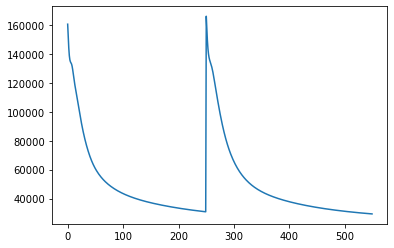

In [81]:
nag()

In [93]:
def adam():
  #initialization
  prevW={}
  prevb={}
  mW={}
  mb={}
  epsilon=1e-8
  beta1=0.9
  beta2=0.999
  prevW['W'+str(1)] =np.zeros((noOfneuronsEach[0], inputNeuronSize))
  prevb['b'+str(1)]= np.zeros((noOfneuronsEach[0],1))
  for i in range(2,noOfHiddenLayers+1):
    prevW['W'+str(i)] = np.zeros((noOfneuronsEach[i-1], noOfneuronsEach[i-2]))
    prevb['b'+str(i)]= np.zeros((noOfneuronsEach[i-1],1))
  prevW['W'+str(noOfHiddenLayers+1)] = np.zeros((l, noOfneuronsEach[-1]))
  prevb['b'+str(noOfHiddenLayers+1)]= np.zeros((l,1))

  mW['W'+str(1)] =np.zeros((noOfneuronsEach[0], inputNeuronSize))
  mb['b'+str(1)]= np.zeros((noOfneuronsEach[0],1))
  for i in range(2,noOfHiddenLayers+1):
    mW['W'+str(i)] = np.zeros((noOfneuronsEach[i-1], noOfneuronsEach[i-2]))
    mb['b'+str(i)]= np.zeros((noOfneuronsEach[i-1],1))
  mW['W'+str(noOfHiddenLayers+1)] = np.zeros((l, noOfneuronsEach[-1]))
  mb['b'+str(noOfHiddenLayers+1)]= np.zeros((l,1))


  t=0 #iterations 
  f=0 # update number 
  while(t<iterations):
    print("Epoch ",t)
    mini=0
    while(mini<(noOfImages/batchSize)):
      #print("Batch ",mini)
      X_mini=X_train[(mini*batchSize):((mini+1)*batchSize-1)]
      y_mini=y_train[(mini*batchSize):((mini+1)*batchSize-1)]
      preactivation,activation,yhat=forwardPropagation(X_mini,parameters)
      gradients=backPropagation(parameters,activation,preactivation,yhat,X_mini,y_mini)
      f+=1
      for i in range(1,noOfHiddenLayers+2):
        mW['W'+str(i)]= beta1*mW['W'+str(i)]+(1.0 - beta1)* (gradients['W'+str(i)])
        mb['b'+str(i)]= beta1*mb['b'+str(i)]+(1.0 - beta1)* (gradients['b'+str(i)])
        
        prevW['W'+str(i)]= beta2*prevW['W'+str(i)]+(1.0 - beta2)* (gradients['W'+str(i)]**2)
        prevb['b'+str(i)]= beta2*prevb['b'+str(i)]+(1.0 - beta2)* (gradients['b'+str(i)]**2)

        mWHat=(1.0-(beta1**f))*mW['W'+str(i)]
        mbHat=(1.0-(beta1**f))*mb['b'+str(i)]

        vWHat=(1.0-(beta2**f))*prevW['W'+str(i)]
        vbHat=(1.0-(beta2**f))*prevb['b'+str(i)]       

        parameters['W'+str(i)] -=  ((eta/np.sqrt(vWHat+epsilon))*mWHat)
        parameters['b'+str(i)] -=  ((eta/np.sqrt(vbHat+epsilon))*mbHat)
      mini+=1
    _,_,yhat=forwardPropagation(X_train,parameters)
    print("loss after epoch ",Loss(yhat,y_train,X_train))
    
    t+=1
adam()

Epoch  0
loss after epoch  27155.93745441508
Epoch  1
loss after epoch  23596.79468408082
Epoch  2
loss after epoch  21644.606795944233
Epoch  3
loss after epoch  20898.06917928988
Epoch  4
loss after epoch  20167.442591350096
Epoch  5
loss after epoch  19520.631974892807
Epoch  6
loss after epoch  19064.8682344788
Epoch  7
loss after epoch  18650.554327358215
Epoch  8
loss after epoch  18261.199584947633
Epoch  9
loss after epoch  17922.321550681783
Epoch  10
loss after epoch  17619.758608873613
Epoch  11
loss after epoch  17334.82571837925
Epoch  12
loss after epoch  17076.52409833623
Epoch  13
loss after epoch  16825.369545609734
Epoch  14
loss after epoch  16611.311721295628
Epoch  15
loss after epoch  16399.700571759422
Epoch  16
loss after epoch  16213.357048643953
Epoch  17
loss after epoch  16025.995676930792
Epoch  18
loss after epoch  15852.371149447474
Epoch  19
loss after epoch  15677.68336089982
Epoch  20
loss after epoch  15517.978334937528
Epoch  21
loss after epoch  153

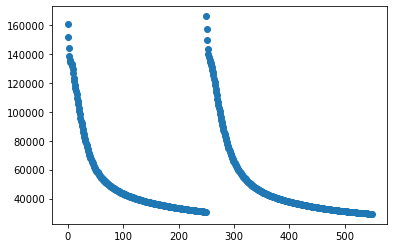

In [85]:
pyplot.plot(range(0,len(loss)), loss, 'o')

In [82]:
#print(loss)

In [94]:
def predict(X_test,y_test):
  _,_,y_hat=forwardPropagation(X_test,parameters)
  y_hat=y_hat.argmax(axis=0)
  correctPred=np.sum(y_hat==y_test)
  print("Accuracy is ", correctPred/X_test.shape[0]*100,"%")
  return (y_hat,correctPred)
print(predict(X_train,y_train))
print(predict(X_test,y_test))

Accuracy is  94.25666666666666 %
(array([9, 0, 0, ..., 3, 0, 5], dtype=int64), 56554)
Accuracy is  87.06 %
(array([9, 2, 1, ..., 8, 1, 5], dtype=int64), 8706)
